In [24]:
# Importar librerias

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
def classical_particle_probability(x, T):
    """Classical particle probability in a harmonic potential.
    Args:
        x (float): position of the particle
        V (function): potential energy function
        T (float): temperature
    Returns:
        float: probability of the particle being at x"""
    beta = 1/T
    return np.exp(-beta * 0.5*x**2)

In [26]:
# Quantum harmonic oscillator information

def potential(x):
    """Quamtum armonic oscillator potential
    
    Args:
        x (float): position of the particle
    Returns:
        float: value of the potential at x"""
    return 0.5*x**2

def energy(n):
    """Quamtum armonic oscillator energy
    
    Args:
        n (int): energy level
    Returns:
        float: value of the energy"""
    return n + 0.5

def wave_function(x, n):
    """Quamtum armonic oscillator wave function
    
    Args:
        x (float): position of the particle
        n (int): energy level
    Returns:
        float: value of the wave function at x"""
    arr = np.zeros(n+1)
    arr[n] = 1
    return (2**n*np.math.factorial(n)*np.sqrt(np.pi))**(-0.5)*np.exp(-0.5*x**2)*np.polynomial.hermite.hermval(x, arr)

def probability_density(x, n):
    """Quamtum armonic oscillator probability density
    
    Args:
        x (float): position of the particle
        n (int): energy level
    Returns:
        float: value of the probability density at x"""
    return wave_function(x, n)**2

In [47]:
# Sampling:

def metropolis(x, delta, n, N_steps):
    """Metropolis algorithm
    Args:
        x (float): initial position
        delta (float): maximum position shift
        n (int): (energy level) quantum number
        N_steps (int): number of steps
    Returns:
        xs: array of x values accepted"""
    xs = []
    for i in range(N_steps):
        x_new = x + np.random.uniform(-delta, delta)
        if np.random.uniform(0, 1) < probability_density(x_new, n)/probability_density(x, n):
            x = x_new
            xs.append(x)
    return np.array(xs)

def metropolis_with_energy_jumps(beta, N_steps, n=0, x=0, delta=0.1):
    """Metropolis algorithm with that alternates between position and energy jumps.
    Args:
        beta (float): inverse temperature
        N_steps (int): number of steps
        n (int): (energy level) quantum number
        x (float): initial position
        delta (float): maximum position shift
    Returns:
        xs: array of x values accepted
        ns: array of n values accepted         
    """
    xs = []
    ns = []
    for i in range(N_steps):
        #if x==0:
        #    x+=1e-5 # to avoid division by zero
        m = n + np.random.choice([-1, 1])
        if m >= 0 and np.random.uniform(0, 1) < ( (probability_density(x, m)/probability_density(x, n)) * np.exp( - beta * (energy(m) - energy(n)) ) ) :
            n = m
            ns.append(n)
        
        #for j in range(100):
        x_new = x + np.random.uniform(-delta, delta)
        if np.random.uniform(0, 1) < probability_density(x_new, n)/probability_density(x, n):
            x = x_new
            xs.append([x, n])
    
    return np.array(xs), np.array(ns)

In [52]:
def analytic_quantum_probability(x, beta):
    """Analytic quantum density matrix
    Args:
        x (float): position of the particle
        beta (float): inverse temperature
    Returns:
        float: probability of the particle being at x and beta"""
    return np.sqrt(np.tanh(beta/2.0)/np.pi) * np.exp(- x**2.0 * np.tanh(beta/2.0)) 

def analytic_classical_probability(x, beta):
    """Analytic classical density matrix
    Args:
        x (float): position of the particle
        beta (float): inverse temperature
    Returns:
        float: probability of the particle being at x and beta"""
    return np.sqrt(beta/(2.0 * np.pi)) * np.exp(- x**2.0 * np.tanh(beta/2.0))

In [5]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 12})

In [6]:
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0.5, 1.0, 'Quantum harmonic oscillator')

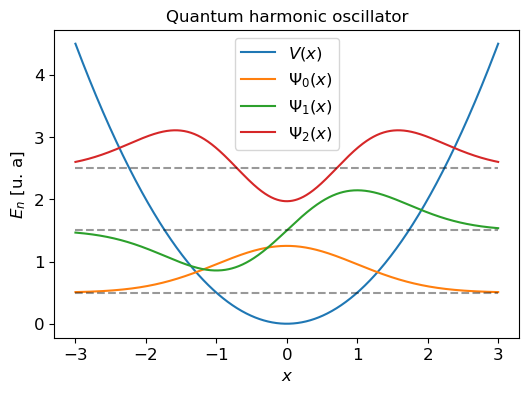

In [33]:
x_grid = np.linspace(-3, 3, 1000) 

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x_grid, potential(x_grid), label='$V(x)$')
for i in range(3):
    ax.plot(x_grid, wave_function(x_grid, i) + energy(i), label='$\Psi_{:d}(x)$'.format(i))
    ax.hlines(energy(i), -3, 3, linestyles='dashed', alpha=0.4, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('$E_n$ [u. a]')
ax.legend()
ax.set_title('Quantum harmonic oscillator', fontsize=BIGGER_SIZE)

## Particula en un potencial armónico cuando $T \rightarrow 0$

Se tiene que $T = 1/\beta$, cuando $T \rightarrow 0$ entonces $\beta \rightarrow \infty$. Por lo que $\pi(x) \sim \exp(-\beta \frac{x^{2}}{2}) = \exp(- \frac{x^{2}}{2T}) \sim \delta(x) $. Computacionalmente hablando se encuentra que

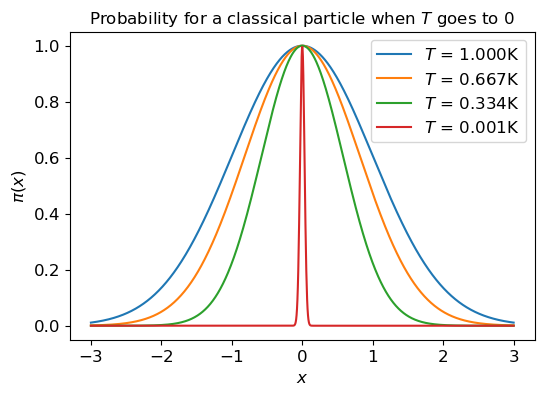

In [8]:
T = np.linspace(1, 1e-3, 4)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for i in range(len(T)):
    ax.plot(x_grid, classical_particle_probability(x_grid, T[i]), label='$T$ = {:.3f}K'.format(T[i]))
ax.set_ylabel('$\pi(x)$')
ax.set_xlabel('$x$')
ax.set_title('Probability for a classical particle when $T$ goes to $0$', fontsize=BIGGER_SIZE)    
ax.legend()

In [31]:
x = 0.0
delta = 0.1
N_steps = 1000000
xs = metropolis(x=x, delta=delta, n=0, N_steps=N_steps)

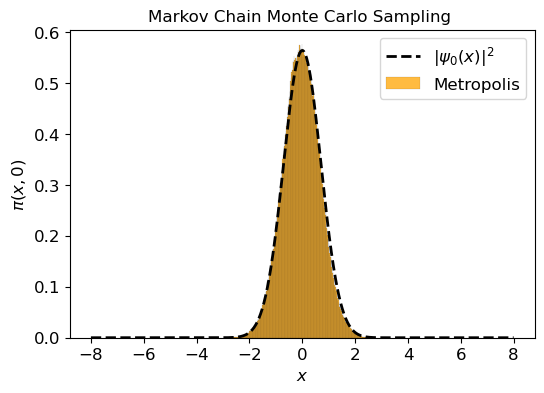

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.histplot(xs, bins=500, stat='density', color='orange', label='Metropolis');
#ax.hist(xs, bins=500, density=True, color='orange', label='MCMC');
ax.plot(x_grid, probability_density(x_grid, 0), '--k', linewidth=2, label='$|\psi_0(x)|^2$')
ax.set_xlabel('$x$')
ax.set_ylabel('$\pi(x)$')
ax.set_title('Markov Chain Monte Carlo Sampling ', fontsize=BIGGER_SIZE)
ax.legend()

In [67]:
beta = np.array([0.2, 1, 5])
N_steps = 1000000

In [76]:
xss = [] 
nss = []
for beta_ in beta:
    xss_, nss_ = metropolis_with_energy_jumps(beta=beta_, N_steps=N_steps)
    xss.append(xss_)
    nss.append(nss_)

/tmp/ipykernel_21976/1562907.py:31: RuntimeWarning: overflow encountered in long_scalars
  return (2**n*np.math.factorial(n)*np.sqrt(np.pi))**(-0.5)*np.exp(-0.5*x**2)*np.polynomial.hermite.hermval(x, arr)
/tmp/ipykernel_21976/1562907.py:31: RuntimeWarning: invalid value encountered in double_scalars
  return (2**n*np.math.factorial(n)*np.sqrt(np.pi))**(-0.5)*np.exp(-0.5*x**2)*np.polynomial.hermite.hermval(x, arr)


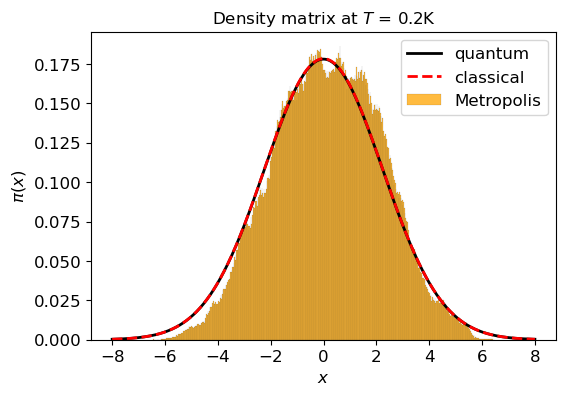

In [75]:
# xss, nss = metropolis_with_energy_jumps(beta=beta[0], N_steps=N_steps)
# fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# sns.histplot(xss[:, 0], bins=500, stat='density', color='orange', label='Metropolis');
# #ax.hist(xs, bins=500, density=True, color='orange', label='MCMC');
# ax.plot(x_grid, analytic_quantum_probability(x_grid, beta[0]), 'k', linewidth=2, label='quantum')
# ax.plot(x_grid, analytic_classical_probability(x_grid, beta[0]), '--r', linewidth=2, label='classical')
# ax.set_xlabel('$x$')
# ax.set_ylabel('$\pi(x)$')
# ax.set_title('Density matrix at $T$ = {:.1f}K'.format(T_), fontsize=BIGGER_SIZE)
# ax.legend()

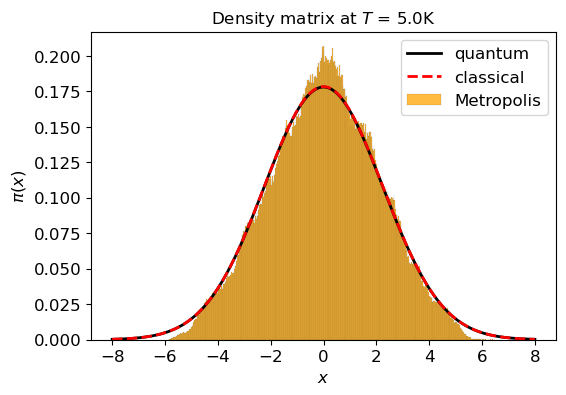

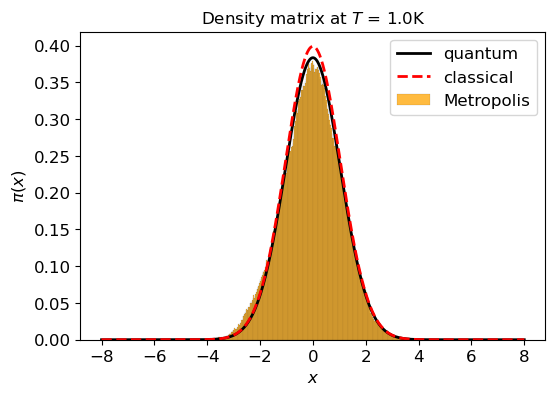

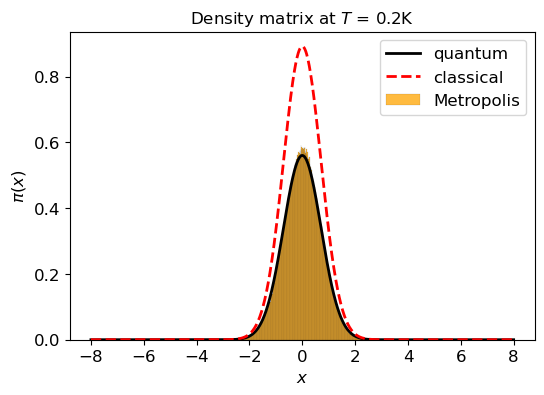

In [77]:
x_grid = np.linspace(-8, 8, 1000)

for beta_, xss_ in zip(beta, xss):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    sns.histplot(xss_[:, 0], bins=500, stat='density', color='orange', label='Metropolis');
    #ax.hist(xs, bins=500, density=True, color='orange', label='MCMC');
    ax.plot(x_grid, analytic_quantum_probability(x_grid, beta_), 'k', linewidth=2, label='quantum')
    ax.plot(x_grid, analytic_classical_probability(x_grid, beta_), '--r', linewidth=2, label='classical')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\pi(x)$')
    ax.set_title('Density matrix at $T$ = {:.1f}K'.format(1/beta_), fontsize=BIGGER_SIZE)
    ax.legend()

In [95]:
xss[0][:, 1].astype(int)

array([0, 0, 0, ..., 1, 0, 1])

In [105]:
np.max(xss[0][:, 1])

16.0

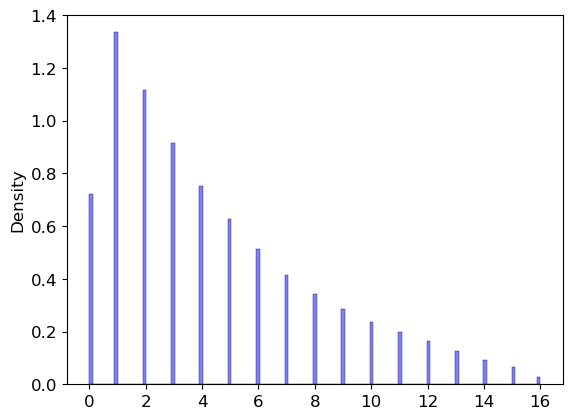

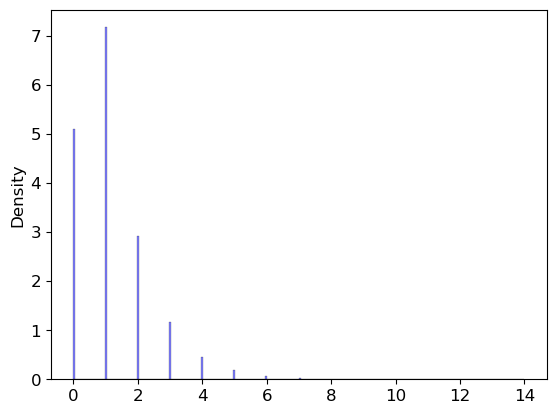

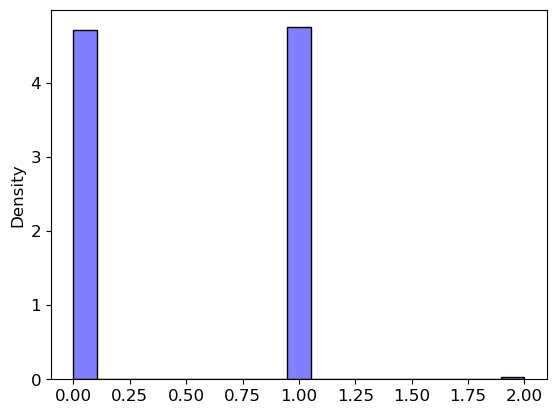

In [114]:
for i in range(3):
    plt.figure()
    sns.histplot(nss[i], alpha=0.5, stat='density', color='blue', label='Energy jumps')